In [13]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
from sklearn.mixture import GaussianMixture as GM
import import_ipynb
from iaml01cw2_helpers import *
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy as hc

In [14]:
#--- Code for loading the data set and pre-processing --->
DataPath = os.path.join(os.getcwd(), 'data')
Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2(DataPath)

In [15]:
# Q3.1
#find sum of squared distances of samples to their closest cluster centre - one val for all Xtrn
def iaml01cw2_q3_1():
    kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
    centers = kmeans.cluster_centers_
    print('kmeans dist = {:.3f}'.format(kmeans.inertia_))
    
    #now find no. of samples in each cluster
    totCount = 0
    for k in range(22):
        count = 0
        for j in range(len(kmeans.labels_)):
            if (kmeans.labels_[j] == k):
                count += 1
                totCount +=1
        print('{} samples in cluster {}'.format(count, k))
        #print(totCount) #should be 22000
            
iaml01cw2_q3_1()   # comment this out when you run the function

kmeans dist = 38185.817
1018 samples in cluster 0
1018
1125 samples in cluster 1
2143
1191 samples in cluster 2
3334
890 samples in cluster 3
4224
1162 samples in cluster 4
5386
1332 samples in cluster 5
6718
839 samples in cluster 6
7557
623 samples in cluster 7
8180
1400 samples in cluster 8
9580
838 samples in cluster 9
10418
659 samples in cluster 10
11077
1276 samples in cluster 11
12353
121 samples in cluster 12
12474
152 samples in cluster 13
12626
950 samples in cluster 14
13576
1971 samples in cluster 15
15547
1251 samples in cluster 16
16798
845 samples in cluster 17
17643
896 samples in cluster 18
18539
930 samples in cluster 19
19469
1065 samples in cluster 20
20534
1466 samples in cluster 21
22000


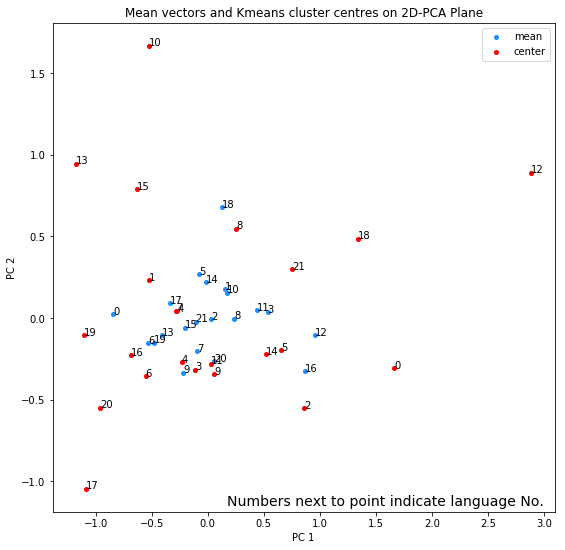

In [12]:
# Q3.2
def iaml01cw2_q3_2():
    kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
    centers = kmeans.cluster_centers_
    
    #find mean vector for each language
    means = []
    for l in range(22):
        lang = Xtrn[Ytrn==l]
        mean = np.mean(lang,axis=0)
        means.append(mean)
    
    #apply pca to mean vectors
    pca = PCA(n_components=2)
    means_pca = pca.fit_transform(means)
    centers_pca = pca.transform(centers)
    
    #plot graph
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111)
    
    ax.scatter(means_pca[:, 0],means_pca[:, 1], s = 16, c='dodgerblue', label = 'mean')
    ax.scatter(centers_pca[:, 0],centers_pca[:, 1], s = 16,c='red', label = 'center')
    ax.text(0.17, -1.15, 'Numbers next to point indicate language No.', fontsize=14)
    ax.set_title('Mean vectors and Kmeans cluster centres on 2D-PCA Plane')
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.legend()
    
    #add annotations
    for p in range(22):
        ax.annotate(p, (means_pca[:, 0][p], means_pca[:, 1][p]), fontsize=10)
        ax.annotate(p, (centers_pca[:, 0][p], centers_pca[:, 1][p]), fontsize=10)

iaml01cw2_q3_2()   # comment this out when you run the function

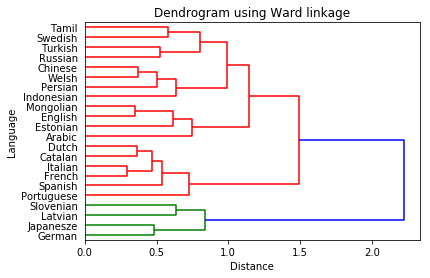

In [6]:
# Q3.3
def iaml01cw2_q3_3():
    means = []
    for l in range(22):
        count = 0
        meanL = np.zeros(26)
        for m in range(22000):
            if (Ytrn[m] == l):
                meanL += Xtrn[m]
                count +=1
        meanL = meanL / count
        means.append(meanL)
    #print(len(means[0])) #22 x 26
    labels = ["Arabic", "Catalan", "Welsh", "German", "English", "Spanish", "Estonian", "Persian", "French", "Indonesian", "Italian", "Japanesze", "Latvian", "Mongolian", "Dutch", "Russian", "Slovenian", "Swedish", "Portuguese", "Tamil", "Turkish", "Chinese"]

    z = hc.linkage(means, method = 'ward')
    d = hc.dendrogram(z, orientation='right', labels=labels)
    plt.title("Dendrogram using Ward linkage")
    plt.xlabel("Distance")
    plt.ylabel("Language")
iaml01cw2_q3_3()   # comment this out when you run the function

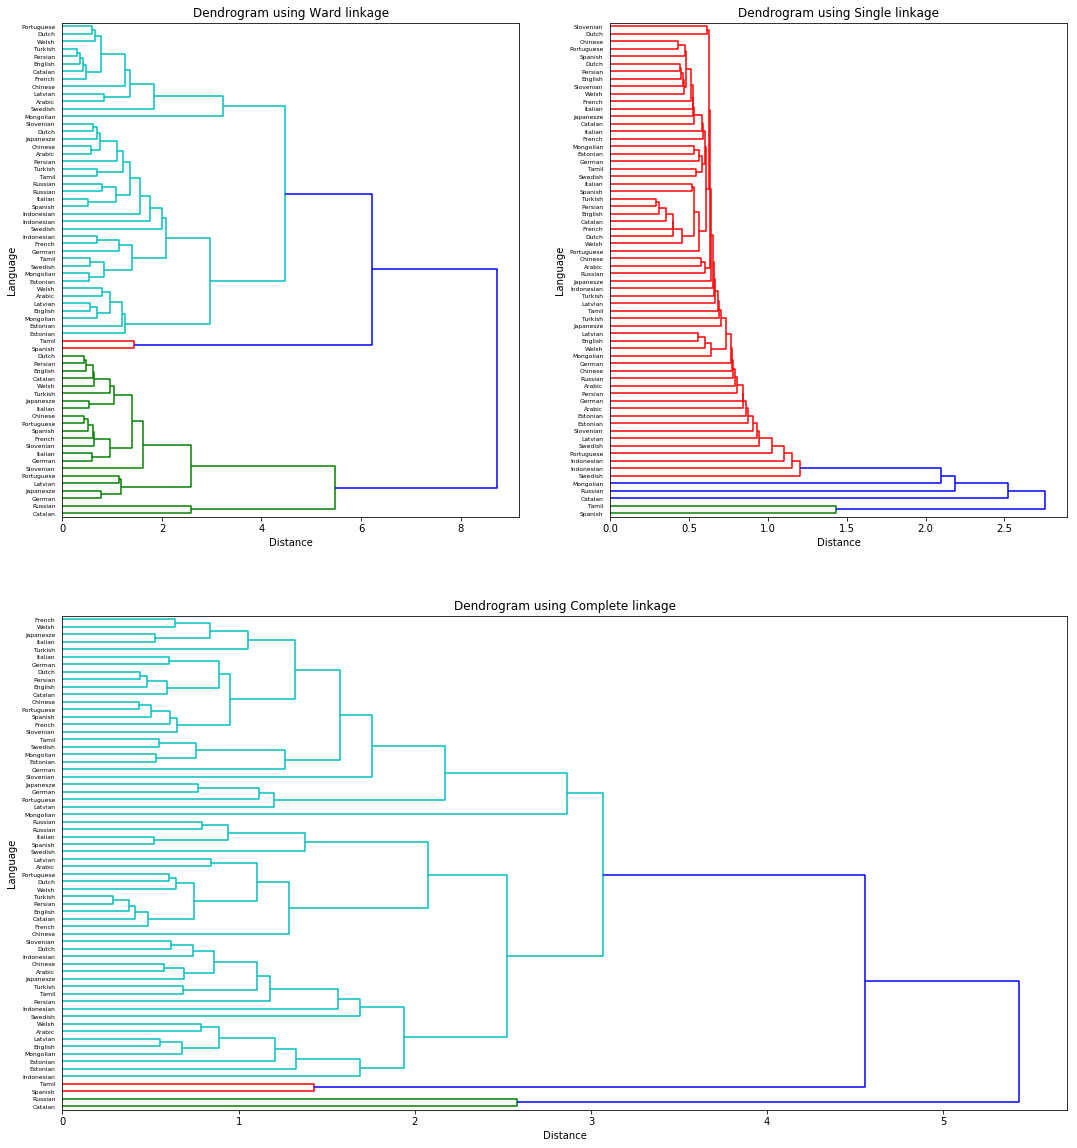

In [6]:
# Q3.4
def iaml01cw2_q3_4():
    #split languages
    classes = np.unique(Ytrn); 
    langs = []
    for c in classes: 
        lang = (Xtrn[Ytrn==c])
        langs.append(lang)

    cents = np.zeros((22,3,26))
    #print(Xtrn.shape)
    for i in range(22):
        kmeans = KMeans(n_clusters=3, random_state=1)
        cl = kmeans.fit(langs[i])
        cents[i] = kmeans.cluster_centers_
        
    #print(cents.shape)
    
    #now reshape to get 66 vectors
    cents = cents.reshape(66,26)
    
    #3 lots of each language
    labels = ['Arabic', 'Arabic', 'Arabic', 'Catalan', 'Catalan', 'Catalan', 'Welsh', 'Welsh',
              'Welsh', 'German', 'German', 'German', 'English', 'English', 'English', 'Spanish',
              'Spanish', 'Spanish', 'Estonian', 'Estonian', 'Estonian', 'Persian', 'Persian',
              'Persian', 'French', 'French', 'French', 'Indonesian', 'Indonesian', 'Indonesian',
              'Italian', 'Italian', 'Italian', 'Japanesze', 'Japanesze', 'Japanesze', 'Latvian',
              'Latvian', 'Latvian', 'Mongolian', 'Mongolian', 'Mongolian', 'Dutch', 'Dutch', 'Dutch',
              'Russian', 'Russian', 'Russian', 'Slovenian', 'Slovenian', 'Slovenian', 'Swedish',
              'Swedish', 'Swedish', 'Portuguese', 'Portuguese', 'Portuguese', 'Tamil', 'Tamil',
              'Tamil', 'Turkish', 'Turkish', 'Turkish', 'Chinese', 'Chinese', 'Chinese']

    #linkages
    wardhc = hc.ward(cents)
    singlehc = hc.single(cents)
    completehc = hc.complete(cents)
    
    
    fig = plt.figure(figsize=(18,20))
    plt.subplot(2, 2, 1) # plot top left
    plt.title("Dendrogram using Ward linkage")
    plt.xlabel("Distance")
    plt.ylabel("Language")
    hc.dendrogram(wardhc, orientation='right', labels=labels)

    plt.subplot(2, 2, 2) # plot top right
    hc.dendrogram(singlehc, orientation='right', labels=labels)
    plt.title("Dendrogram using Single linkage")
    plt.xlabel("Distance")
    plt.ylabel("Language")

    plt.subplot(2, 1, 2) # plot bottom
    hc.dendrogram(completehc, orientation='right', labels=labels)
    plt.title("Dendrogram using Complete linkage")
    plt.xlabel("Distance")
    plt.ylabel("Language")

iaml01cw2_q3_4()   # comment this out when you run the function

Avg. LL: 16.394 for full cov Matrix on Train set with K = 1
Avg. LL: 15.811 for full cov Matrix on Test set with K = 1
Avg. LL: 14.280 for diag cov Matrix on Train set with K = 1
Avg. LL: 13.843 for diag cov Matrix on Test set with K = 1
Avg. LL: 18.086 for full cov Matrix on Train set with K = 3
Avg. LL: 17.066 for full cov Matrix on Test set with K = 3
Avg. LL: 15.398 for diag cov Matrix on Train set with K = 3
Avg. LL: 15.041 for diag cov Matrix on Test set with K = 3
Avg. LL: 19.036 for full cov Matrix on Train set with K = 5
Avg. LL: 16.489 for full cov Matrix on Test set with K = 5
Avg. LL: 16.010 for diag cov Matrix on Train set with K = 5
Avg. LL: 15.909 for diag cov Matrix on Test set with K = 5
Avg. LL: 21.062 for full cov Matrix on Train set with K = 10
Avg. LL: 14.622 for full cov Matrix on Test set with K = 10
Avg. LL: 16.917 for diag cov Matrix on Train set with K = 10
Avg. LL: 16.568 for diag cov Matrix on Test set with K = 10
Avg. LL: 22.786 for full cov Matrix on Train

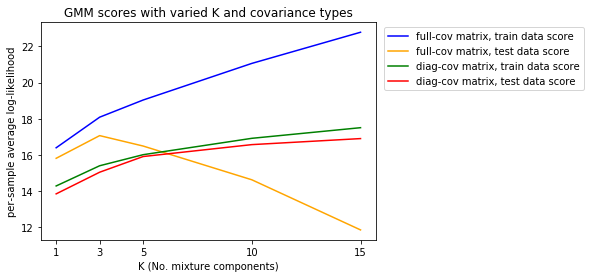

In [18]:
# Q3.5
def iaml01cw2_q3_5():
    # use lang 0 only
    lang0_trn = Xtrn[Ytrn==0]
    lang0_tst = Xtst[Ytst==0]
    #print(lang0_trn.shape)
    #print(lang0_tst.shape)

    # 5x2x2 array for scores
    # 5 for each K x 2 for each type of covariance x 2 for each dataset
    scores = np.zeros((5,2,2))
    
    comps = [1, 3, 5, 10, 15]
    
    #find gmm scores for each value in comps
    for i in range(5):
        K = comps[i]
        gmm_full = GM(n_components=K, covariance_type='full', random_state=1)
        gmm_diag = GM(n_components=K, covariance_type='diag', random_state=1)
        gmm_full.fit(lang0_trn)
        gmm_diag.fit(lang0_trn)
        
        
        # full train
        scores[i][1][0] = gmm_full.score(lang0_trn)
        print('Avg. LL: {:.3f} for full cov Matrix on Train set with K = {}'.format(scores[i][1][0], K))
        
        # full test
        scores[i][1][1] = gmm_full.score(lang0_tst)
        print('Avg. LL: {:.3f} for full cov Matrix on Test set with K = {}'.format(scores[i][1][1], K))
        
        # diag train
        scores[i][0][0] = gmm_diag.score(lang0_trn)
        print('Avg. LL: {:.3f} for diag cov Matrix on Train set with K = {}'.format(scores[i][0][0], K))

        # diag test
        scores[i][0][1] = gmm_diag.score(lang0_tst)
        print('Avg. LL: {:.3f} for diag cov Matrix on Test set with K = {}'.format(scores[i][0][1], K))

    # plot scores
    plt.title("GMM scores with varied K and covariance types")
    plt.plot(comps, scores[:,1,0], color='blue', label='full-cov matrix, train data score')
    plt.plot(comps, scores[:,1,1], color='orange', label='full-cov matrix, test data score')
    plt.plot(comps, scores[:,0,0], color='green', label='diag-cov matrix, train data score')
    plt.plot(comps, scores[:,0,1], color='red', label='diag-cov matrix, test data score')
    plt.xlabel('K (No. mixture components)')
    plt.ylabel('per-sample average log-likelihood')
    plt.xticks(comps)
    plt.legend(bbox_to_anchor=(1.01, 1))

iaml01cw2_q3_5()   # comment this out when you run the function